# Grid Search

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from random import *

In [69]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [70]:
print(f'{df.head()}')
print('---------------------------------------------------')
print(f'{df.describe()}')
print('---------------------------------------------------')
print(f'{df.info()}')
print('---------------------------------------------------')
print(f'{df.columns}')

    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0
---------------------------------------------------
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
---------------------------------------------------
<class 'pandas.core.fra

In [141]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=9)

### Feature Scaling

In [142]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Kernel SVM Classification to the Training set

In [153]:
classifier = SVC(C=1, kernel='rbf', gamma=0.508, random_state=9)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.508, kernel='rbf',
  max_iter=-1, probability=False, random_state=9, shrinking=True,
  tol=0.001, verbose=False)

### Predicting the Test set results

In [154]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

### Applying k-Fold Cross Validation

In [158]:
accuracies = cross_val_score(
    estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
[print(f'{round(num*100,2)}%') for num in accuracies]
print(f'Accuracy means: {round(accuracies.mean()*100,2)}%')
print(f'Accuracy standard deviation: {round(accuracies.std(),4)}')

90.32%
83.87%
96.77%
86.67%
86.67%
93.33%
96.67%
89.66%
96.55%
79.31%
Accuracy means: 89.98%
Accuracy standard deviation: 0.0564


### Making the Confusion Matrix

In [159]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  2],
       [ 3, 37]])

In [160]:
accuracy = (cm[0][0]+cm[1][1])/(cm.sum())
print(f'Accuracy = {accuracy*100}%')

Accuracy = 95.0%


### Applying Grid Search to find the best model and the best parameters

In [148]:
gamma_range = [round(uniform(0.01,.99),5) for num in range(1,30)]

In [149]:
C_range = [randint(1, 1), randint(2, 5), randint(6, 11),
           randint(12, 19), randint(20, 29), randint(30, 41),
           randint(42, 55), randint(56, 71), randint(72, 89),
           randint(90, 109), randint(110, 131), randint(132, 155),
           randint(156, 181), randint(182, 209), randint(210, 239),
           randint(240, 271), randint(272, 305), randint(306, 341),
           randint(342, 379), randint(380, 419), randint(420, 461),
           randint(462, 505), randint(506, 551), randint(552, 599),
           randint(600, 649), randint(650, 701), randint(702, 755),
           randint(756, 811), randint(812, 869), randint(870, 929),
           randint(930, 991), randint(992, 1055)]

In [150]:
parameters = [{'C': C_range,
               'kernel': ['linear']},
              {'C': C_range,
               'kernel': ['rbf'],
               'gamma': gamma_range}
              ]

grid_search = GridSearchCV(estimator=classifier, param_grid=parameters,
                           scoring='accuracy', cv=10,
                           n_jobs=-1, iid=True)

In [151]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [152]:
print(f'best accuracy: {best_accuracy}')
print(f'best parameters: {best_parameters}')

best accuracy: 0.9
best parameters: {'C': 1, 'gamma': 0.508, 'kernel': 'rbf'}


### Visualising the Training set results

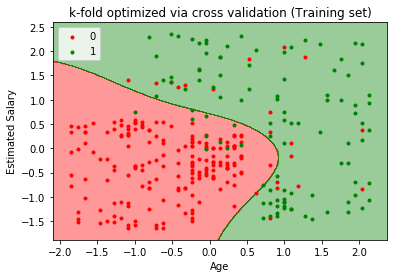

In [161]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - .25,
                               stop=X_set[:, 0].max() + .25, step=0.01),
                     np.arange(start=X_set[:, 1].min() - .25,
                               stop=X_set[:, 1].max() + .25, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array(
    [X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.4, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['r', 'g'][i], marker='.', label=j)

plt.title('k-fold optimized via cross validation (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

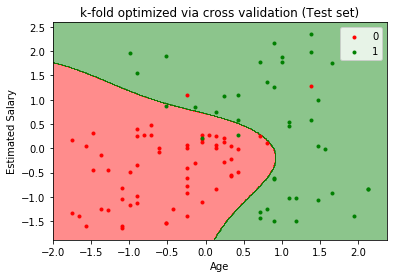

In [162]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - .25,
                               stop=X_set[:, 0].max() + .25, step=0.01),
                     np.arange(start=X_set[:, 1].min() - .25,
                               stop=X_set[:, 1].max() + .25, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array(
    [X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.45, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['r', 'g'][i], marker='.', label=j)

plt.title('k-fold optimized via cross validation (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()